In [1]:
import numpy as np
import pandas as pd

# Load data
data = pd.read_csv("../data/pb2/spaceship_trajectory3D.csv")

# Extract observations
pos_true = data[["x_true", "y_true", "z_true"]].values
pos_obs = data[["x_obs", "y_obs", "z_obs"]].values
n_timesteps = len(pos_obs)

In [2]:
dt = 1.0
A = np.block([
    [np.eye(3), dt*np.eye(3)],
    [np.zeros((3, 3)), np.eye(3)]
])
H = np.hstack([np.eye(3), np.zeros((3, 3))])
Q = 1e-5 * np.eye(6)
R = np.diag([0.012, 0.015**2, 0.022])

In [3]:
# Initialization
x_hat = np.zeros((100, 6))
P = 0.01 * np.eye(6)

# Kalman filter loop
for t_idx in range(1, 100):
    # prediction
    x_pred = A @ x_hat[t_idx-1]
    P_pred = A @ P @ A.T + Q

    # Kalman Gain
    z = pos_obs[t_idx]
    K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)

    # update
    x_hat[t_idx] = x_pred + K @ (z - H @ x_pred)
    P = (np.eye(6) - K @ H) @ P_pred

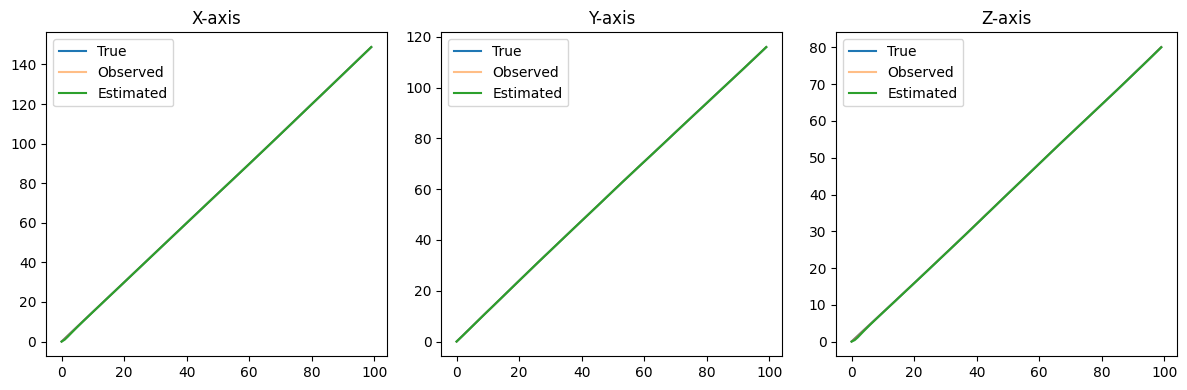

In [4]:
import matplotlib.pyplot as plt
# Plotting results
plt.figure(figsize=(12, 4))
for i, label in enumerate(['x', 'y', 'z']):
    plt.subplot(1, 3, i+1)
    plt.plot(pos_true[:, i], label="True")
    plt.plot(pos_obs[:, i], label="Observed", alpha=0.5)
    plt.plot(x_hat[:, i], label="Estimated")
    plt.title(f"{label.upper()}-axis")
    plt.legend()
plt.tight_layout()
plt.savefig("../output/figures/kalman_filter_trajectory.pdf")
plt.show()


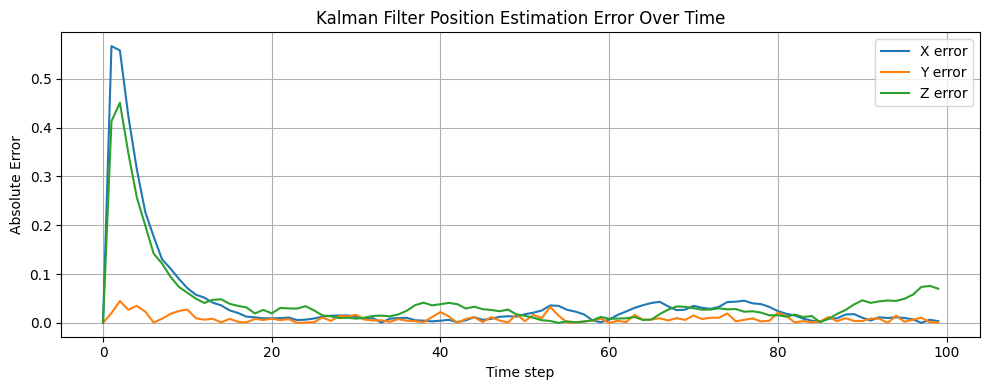

In [5]:
errors = x_hat[:, :3] - pos_true  # shape: (100, 3)
rmse_t = np.sqrt((errors ** 2))   # 每一时刻的误差

plt.figure(figsize=(10, 4))
plt.plot(rmse_t[:, 0], label="X error")
plt.plot(rmse_t[:, 1], label="Y error")
plt.plot(rmse_t[:, 2], label="Z error")
plt.xlabel("Time step")
plt.ylabel("Absolute Error")
plt.title("Kalman Filter Position Estimation Error Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("../output/figures/kalman_filter_error.pdf")
plt.show()